In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
for i in 'train_data', 'train_labels', 'test_data', 'test_labels':
    print(i+':', eval(i).shape)

train_data: (25000,)
train_labels: (25000,)
test_data: (25000,)
test_labels: (25000,)


In [4]:
l = []
for i in train_data:
    l.append(len(i))
print(l[:100])

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171]


In [5]:
%%time
max([max(s) for s in train_data])

CPU times: user 140 ms, sys: 3.52 ms, total: 144 ms
Wall time: 177 ms


9999

In [6]:
word_index = imdb.get_word_index()

In [7]:
%%time
len(word_index), list(zip(list(word_index.keys())[:10], list(word_index.values())[:10]))

CPU times: user 6.95 ms, sys: 1.85 ms, total: 8.8 ms
Wall time: 15.9 ms


(88584,
 [('fawn', 34701),
  ('tsukino', 52006),
  ('nunnery', 52007),
  ('sonja', 16816),
  ('vani', 63951),
  ('woods', 1408),
  ('spiders', 16115),
  ('hanging', 2345),
  ('woody', 2289),
  ('trawling', 52008)])

In [8]:
reverse_word_index = dict([(v, k) for k, v in word_index.items()])

In [9]:
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [10]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [11]:
print([reverse_word_index.get(i-3, '?') for i in train_data[0]])

['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', 'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cry', 'at', 'a', 'film', '

In [12]:
import numpy as np

# one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [13]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
x_train[0] # 不太懂

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels, dtype='float32')
y_test = np.asarray(test_labels, dtype='float32')

In [16]:
sum(y_train == train_labels)/train_labels.shape[0]

1.0

In [17]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']) # 指標

In [19]:
from keras import optimizers, losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 282us/step - loss: 0.5339 - binary_accuracy: 0.7739 - val_loss: 0.4060 - val_binary_accuracy: 0.8747
Epoch 2/20
15000/15000 [==============================] - 2s 138us/step - loss: 0.3258 - binary_accuracy: 0.9054 - val_loss: 0.3168 - val_binary_accuracy: 0.8906
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.2408 - binary_accuracy: 0.9269 - val_loss: 0.2873 - val_binary_accuracy: 0.8904
Epoch 4/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1893 - binary_accuracy: 0.9414 - val_loss: 0.2761 - val_binary_accuracy: 0.8901
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1542 - binary_accuracy: 0.9513 - val_loss: 0.2825 - val_binary_accuracy: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1255 - binary_accuracy: 0.9637 - val_loss: 0.2883 - val_bin

In [31]:
history_dict = history.history

In [32]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

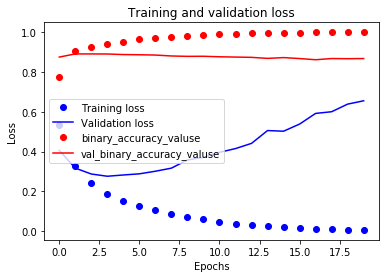

In [44]:
import matplotlib.pyplot as plt

loss_valuse = history_dict['loss']
val_loss_values = history_dict['val_loss']
binary_accuracy_valuse = history_dict['binary_accuracy']
val_binary_accuracy_valuse = history_dict['val_binary_accuracy']


plt.plot(loss_valuse, 'bo', label='Training loss')
plt.plot(val_loss_values, 'b', label='Validation loss')
plt.plot(binary_accuracy_valuse, 'ro', label='binary_accuracy_valuse')
plt.plot(val_binary_accuracy_valuse, 'r', label='val_binary_accuracy_valuse')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [47]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 140us/step - loss: 0.4744 - accuracy: 0.8127
Epoch 2/4
25000/25000 [==============================] - 2s 75us/step - loss: 0.2676 - accuracy: 0.9082
Epoch 3/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2023 - accuracy: 0.9279
Epoch 4/4
25000/25000 [==============================] - 4s 153us/step


In [48]:
results

[0.2977576357269287, 0.8812000155448914]

In [49]:
model.predict(x_test)

array([[0.16065049],
       [0.99994546],
       [0.624494  ],
       ...,
       [0.07585177],
       [0.06136534],
       [0.54510903]], dtype=float32)